In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

mouse_metadata = os.path.join("Pymaceuticals","data","Mouse_metadata.csv")
study_results = os.path.join("Pymaceuticals","data","Study_results.csv")

mouse_data = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

data = pd.merge(left = results, right = mouse_data, on = "Mouse ID", how = 'left')
data = data[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [56]:
unique_mice = data['Mouse ID'].nunique()
print(unique_mice)

249


In [57]:
duplicate_tp = data[data.duplicated(['Mouse ID','Timepoint'], keep = False)]
duplicate_tp = duplicate_tp['Mouse ID'].unique()
duplicate_tp

array(['g989'], dtype=object)

In [60]:
duplicate_mdata = data[data['Mouse ID'] == 'g989']
duplicate_mdata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [97]:
#clean_data = data[data['Mouse ID'] != 'g989']
clean_data = data[~data['Mouse ID'].isin(duplicate_tp)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
print(clean_data['Mouse ID'].nunique())

248


In [96]:
##SUMMARY STATS
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.',
                         'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar Plots and Charts

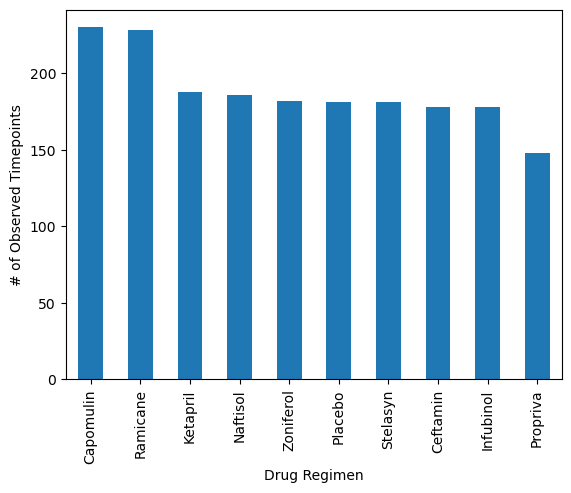

In [123]:
drug_count = clean_data.groupby('Drug Regimen').size()
drug_counts = drug_count.sort_values(ascending=False)
drug_counts.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.show()